#**1- Data Preprocessing: Filling Missing Values**

In [27]:
import csv
import pandas as pd
import numpy as np
from datetime import datetime
#df = pd.read_csv()

In [29]:
data = {'Place': ['Amsterdam', 'Barcelona', 'Paris', 'Geneva', 'Munich', 'Athens', 'Vienna'],
        'Temp_Jan': [3.4, 11.8, 5.0, 1.5, 0.3, 9.9, 1.2],
        'Temp_Jul': [17.6, 25.7, 20.6, 20.2, 19.4, 28.5, 19.1],
        'Language': ['Dutch', 'Catalan and Spanish', 'French', 'French', 'German', 'Greek', 'German'],
        'Altitude': [-2, 12, np.nan, 375, np.nan, 338, np.nan],
        'MeasureDate':[np.nan, '01-01-2013',np.nan, '01-12-2015', '31-12-2015', np.nan, '01-01-2017'],
        'Population': [1351587,4740000,10601122,198072,1450381, 3090508, 2600000]}

# convert into Dataframe
df = pd.DataFrame(data, columns = ['Place', 'Temp_Jan', 'Temp_Jul', 'Language', 'Altitude','MeasureDate', 'Population'])

In [138]:
df.head(7)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
0,Amsterdam,3.4,17.6,Dutch,-2.0,NaN,1351587
1,Barcelona,11.8,25.7,Catalan and Spanish,12.0,01-01-2013,4740000
2,Paris,5.0,20.6,French,NaN,NaN,10601122
3,Geneva,1.5,20.2,French,375.0,01-12-2015,198072
4,Munich,0.3,19.4,German,NaN,31-12-2015,1450381
5,Athens,9.9,28.5,Greek,338.0,NaN,3090508
6,Vienna,1.2,19.1,German,NaN,01-01-2017,2600000


In [16]:
print(df.shape)

(7, 7)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7 non-null      object 
 1   Temp_Jan     7 non-null      float64
 2   Temp_Jul     7 non-null      float64
 3   Language     7 non-null      object 
 4   Altitude     4 non-null      float64
 5   MeasureDate  4 non-null      object 
 6   Population   7 non-null      int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 520.0+ bytes


In [30]:
pd.isnull(df)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
0,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False
5,False,False,False,False,False,True,False
6,False,False,False,False,True,False,False


In [125]:
#There is a simple way to check the number of missing values per variable, using the is.null function.
df.isnull().sum()

Place          0
Temp_Jan       0
Temp_Jul       0
Language       0
Altitude       3
MeasureDate    3
Population     0
dtype: int64

In [21]:
#The inverse is also possible, that is counting the number of nonmissing values.
df.count()

Place          7
Temp_Jan       7
Temp_Jul       7
Language       7
Altitude       6
MeasureDate    4
Population     7
dtype: int64

In [22]:
#Missing values are automatically omitted from summary statistics, such as describe()
df['Altitude'].describe()

count      6.000000
mean     297.500000
std      240.059784
min       -2.000000
25%       93.500000
50%      356.500000
75%      483.750000
max      542.000000
Name: Altitude, dtype: float64

In [12]:
#It is possible to replace values with NaNs that fulfill a certain condition, for example if Altitude is larger than 500 m
df.loc[df['Altitude']>350, 'Altitude'] = np.nan 


In [25]:
df['Altitude']

0     -2.0
1     12.0
2      NaN
3      NaN
4      NaN
5    338.0
6      NaN
Name: Altitude, dtype: float64

In [26]:
df.head()

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
0,Amsterdam,3.4,17.6,Dutch,-2.0,NaN,1351587
1,Barcelona,11.8,25.7,Catalan and Spanish,12.0,NaN,4740000
2,Paris,5.0,20.6,French,NaN,01-01-2013,10601122
3,Geneva,1.5,20.2,French,NaN,01-12-2015,198072
4,Munich,0.3,19.4,German,NaN,31-12-2015,1450381


**Filling Missing Values**

1- Removing rows

In [14]:
data = {'Place': ['Amsterdam', 'Barcelona', 'Paris', 'Geneva', 'Munich', 'Athens', 'Vienna'],
        'Temp_Jan': [3.4, 11.8, 5.0, 1.5, 0.3, 9.9, 1.2],
        'Temp_Jul': [17.6, 25.7, 20.6, 20.2, 19.4, 28.5, 19.1],
        'Language': ['Dutch', 'Catalan and Spanish', 'French', 'French', 'German', 'Greek', 'German'],
        'Altitude': [-2, 12, np.nan, 375, np.nan, 338, np.nan],
        'MeasureDate':[np.nan, '01-01-2013',np.nan, '01-12-2015', '31-12-2015', np.nan, '01-01-2017'],
        'Population': [1351587,4740000,10601122,198072,1450381, 3090508, 2600000]}

# convert into Dataframe
df = pd.DataFrame(data, columns = ['Place', 'Temp_Jan', 'Temp_Jul', 'Language', 'Altitude','MeasureDate', 'Population'])


#if the number of null values is very less in the data, so we can drop these values.
df = df.dropna(axis= 0)
df.isnull().sum()

Place          0
Temp_Jan       0
Temp_Jul       0
Language       0
Altitude       0
MeasureDate    0
Population     0
dtype: int64


In [15]:
df

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
1,Barcelona,11.8,25.7,Catalan and Spanish,12.0,01-01-2013,4740000
3,Geneva,1.5,20.2,French,375.0,01-12-2015,198072


In [17]:
#counting values, each row
df['Altitude'].value_counts()

12.0     1
375.0    1
Name: Altitude, dtype: int64

2- Replacing with mean or median value

In [23]:
data = {'Place': ['Amsterdam', 'Barcelona', 'Paris', 'Geneva', 'Munich', 'Athens', 'Vienna'],
        'Temp_Jan': [3.4, 11.8, 5.0, 1.5, 0.3, 9.9, 1.2],
        'Temp_Jul': [17.6, 25.7, 20.6, 20.2, 19.4, 28.5, 19.1],
        'Language': ['Dutch', 'Catalan and Spanish', 'French', 'French', 'German', 'Greek', 'German'],
        'Altitude': [-2, 12, np.nan, 375, np.nan, 338, np.nan],
        'MeasureDate':[np.nan, '01-01-2013',np.nan, '01-12-2015', '31-12-2015', np.nan, '01-01-2017'],
        'Population': [1351587,4740000,10601122,198072,1450381, 3090508, 2600000]}

# convert into Dataframe
df = pd.DataFrame(data, columns = ['Place', 'Temp_Jan', 'Temp_Jul', 'Language', 'Altitude','MeasureDate', 'Population'])


df['Altitude'].fillna(int(df['Altitude'].mean()), inplace=True)


In [24]:
df

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
0,Amsterdam,3.4,17.6,Dutch,-2.0,NaN,1351587
1,Barcelona,11.8,25.7,Catalan and Spanish,12.0,01-01-2013,4740000
2,Paris,5.0,20.6,French,180.0,NaN,10601122
3,Geneva,1.5,20.2,French,375.0,01-12-2015,198072
4,Munich,0.3,19.4,German,180.0,31-12-2015,1450381
5,Athens,9.9,28.5,Greek,338.0,NaN,3090508
6,Vienna,1.2,19.1,German,180.0,01-01-2017,2600000


In [162]:
df['Altitude'].fillna(df['Altitude'].median(), inplace=True)
df

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
0,Amsterdam,3.4,17.6,Dutch,-2.0,NaN,1351587
1,Barcelona,11.8,25.7,Catalan and Spanish,12.0,01-01-2013,4740000
2,Paris,5.0,20.6,French,180.0,NaN,10601122
3,Geneva,1.5,20.2,French,375.0,01-12-2015,198072
4,Munich,0.3,19.4,German,180.0,31-12-2015,1450381
5,Athens,9.9,28.5,Greek,338.0,NaN,3090508
6,Vienna,1.2,19.1,German,180.0,01-01-2017,2600000


3- Replacing with Zero Value

In [154]:
data = {'Place': ['Amsterdam', 'Barcelona', 'Paris', 'Geneva', 'Munich', 'Athens', 'Vienna'],
        'Temp_Jan': [3.4, 11.8, 5.0, 1.5, 0.3, 9.9, 1.2],
        'Temp_Jul': [17.6, 25.7, 20.6, 20.2, 19.4, 28.5, 19.1],
        'Language': ['Dutch', 'Catalan and Spanish', 'French', 'French', 'German', 'Greek', 'German'],
        'Altitude': [-2, 12, np.nan, 375, np.nan, 338, np.nan],
        'MeasureDate':[np.nan, '01-01-2013',np.nan, '01-12-2015', '31-12-2015', np.nan, '01-01-2017'],
        'Population': [1351587,4740000,10601122,198072,1450381, 3090508, 2600000]}

# convert into Dataframe
df = pd.DataFrame(data, columns = ['Place', 'Temp_Jan', 'Temp_Jul', 'Language', 'Altitude','MeasureDate', 'Population'])



df['Altitude'] = df['Altitude'].fillna(0)

In [155]:
df

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
0,Amsterdam,3.4,17.6,Dutch,-2.0,NaN,1351587
1,Barcelona,11.8,25.7,Catalan and Spanish,12.0,01-01-2013,4740000
2,Paris,5.0,20.6,French,0.0,NaN,10601122
3,Geneva,1.5,20.2,French,375.0,01-12-2015,198072
4,Munich,0.3,19.4,German,0.0,31-12-2015,1450381
5,Athens,9.9,28.5,Greek,338.0,NaN,3090508
6,Vienna,1.2,19.1,German,0.0,01-01-2017,2600000


4- Using Previous Value

In [156]:
data = {'Place': ['Amsterdam', 'Barcelona', 'Paris', 'Geneva', 'Munich', 'Athens', 'Vienna'],
        'Temp_Jan': [3.4, 11.8, 5.0, 1.5, 0.3, 9.9, 1.2],
        'Temp_Jul': [17.6, 25.7, 20.6, 20.2, 19.4, 28.5, 19.1],
        'Language': ['Dutch', 'Catalan and Spanish', 'French', 'French', 'German', 'Greek', 'German'],
        'Altitude': [-2, 12, np.nan, 375, np.nan, 338, np.nan],
        'MeasureDate':[np.nan, '01-01-2013',np.nan, '01-12-2015', '31-12-2015', np.nan, '01-01-2017'],
        'Population': [1351587,4740000,10601122,198072,1450381, 3090508, 2600000]}

# convert into Dataframe
df = pd.DataFrame(data, columns = ['Place', 'Temp_Jan', 'Temp_Jul', 'Language', 'Altitude','MeasureDate', 'Population'])



df = df.fillna(method = 'ffill')

In [157]:
df

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
0,Amsterdam,3.4,17.6,Dutch,-2.0,NaN,1351587
1,Barcelona,11.8,25.7,Catalan and Spanish,12.0,01-01-2013,4740000
2,Paris,5.0,20.6,French,12.0,01-01-2013,10601122
3,Geneva,1.5,20.2,French,375.0,01-12-2015,198072
4,Munich,0.3,19.4,German,375.0,31-12-2015,1450381
5,Athens,9.9,28.5,Greek,338.0,31-12-2015,3090508
6,Vienna,1.2,19.1,German,338.0,01-01-2017,2600000


4- Replacing with constent Value

In [25]:
data = {'Place': ['Amsterdam', 'Barcelona', 'Paris', 'Geneva', 'Munich', 'Athens', 'Vienna'],
        'Temp_Jan': [3.4, 11.8, 5.0, 1.5, 0.3, 9.9, 1.2],
        'Temp_Jul': [17.6, 25.7, 20.6, 20.2, 19.4, 28.5, 19.1],
        'Language': ['Dutch', 'Catalan and Spanish', 'French', 'French', 'German', 'Greek', 'German'],
        'Altitude': [-2, 12, np.nan, 375, np.nan, 338, np.nan],
        'MeasureDate':[np.nan, '01-01-2013',np.nan, '01-12-2015', '31-12-2015', np.nan, '01-01-2017'],
        'Population': [1351587,4740000,10601122,198072,1450381, 3090508, 2600000]}

# convert into Dataframe
df = pd.DataFrame(data, columns = ['Place', 'Temp_Jan', 'Temp_Jul', 'Language', 'Altitude','MeasureDate', 'Population'])


df["MeasureDate"].replace(np.nan, 'I donnot have it', inplace = True)

In [159]:
df.head(5)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
0,Amsterdam,3.4,17.6,Dutch,-2.0,I donnot have it,1351587
1,Barcelona,11.8,25.7,Catalan and Spanish,12.0,01-01-2013,4740000
2,Paris,5.0,20.6,French,NaN,I donnot have it,10601122
3,Geneva,1.5,20.2,French,375.0,01-12-2015,198072
4,Munich,0.3,19.4,German,NaN,31-12-2015,1450381


#**2- Data Preprocessing: Binning**

Data binning (or bucketing) groups data in bins (or buckets), in the sense that it replaces values contained into a small interval with a single representative value for that interval. Sometimes binning improves accuracy in predictive models.

Binning can be applied to convert numeric values to categorical or to sample (quantise) numeric values. 

* convert numeric to categorical includes binning by distance and binning by frequency
* reduce numeric values includes quantisation (or sampling).

In [31]:
import pandas as pd

raw_data ={
    "city": ["NY", "KL", "Saint John", "Sydney", "Rome", "Fredericton", "toronto", "Halifax", "Montreal"],
    # "rank":["1st, "2nd", "3rd"],
    "score1":[44, 48, 39, 41, 38, 44, 34, 54, 61],
    "score2": [67, 20, 55, 70, 64, 77, 45, 66, 100]
 }

In [32]:
df = pd.DataFrame(raw_data)
df

,city,score1,score2
0,NY,44,67
1,KL,48,20
2,Saint John,39,55
3,Sydney,41,70
4,Rome,38,64
5,Fredericton,44,77
6,toronto,34,45
7,Halifax,54,66
8,Montreal,61,100


In [26]:
# import matplotlib.pyplot as plt
# df['score2'].plot.hist(bins=5)

**Binning by distance**

In this case we define the edges of each bin. We group values related to the column `score2` into four groups.

 In order to do it, we need to calculate the intervals within each group falls. We calculate the interval range as the difference between the maximum and minimum value and then we split this interval into three parts, one for each group. We exploit the functions min() and max() of dataframe to calculate the minimum value and the maximum value of the column `score2`.

In [47]:
min_value = df['score2'].min()
max_value = df['score2'].max()
print(min_value)
print(max_value)

20
100


Now we can calculate the range of each interval, i.e. the minimum and maximum value of each interval. Since we have 4 groups, we need 5 edges of intervals (bins):



* low - (edge1, edge2)
* average - (edge2, edge3)
* good - (edge3, edge4)
* brilliant - (edge4, edge5)

We can use the linspace() function of the numpy package to calculate the 4 bins, equally distributed.

In [48]:
import numpy as np
bins = np.linspace(min_value,max_value, 5)
bins

array([ 20.,  40.,  60.,  80., 100.])

In [49]:
# bins define as 0 to 25, then 25- 50, and 50 to 75 and finally 75 to 100
#bins = [0, 25, 50, 75, 100]

In [50]:
label_names = ['low', 'average', 'good', 'brilliant']

In [53]:
df['grade'] = pd.cut(df['score2'], bins=bins, labels=label_names)

In [54]:
df

,city,score1,score2,grade
0,NY,44,67,good
1,KL,48,20,low
2,Saint John,39,55,good
3,Sydney,41,70,good
4,Rome,38,64,good
5,Fredericton,44,77,brilliant
6,toronto,34,45,average
7,Halifax,54,66,good
8,Montreal,61,100,brilliant


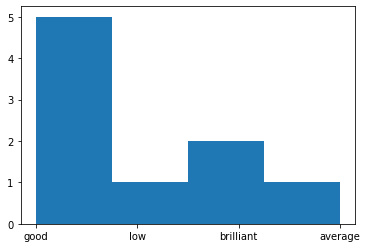

In [57]:
import matplotlib.pyplot as plt

plt.hist(df['grade'], bins=4)
plt.show()